In [1]:
import PauLisa as pl, numpy as np

In [2]:
a=pl.defaultParams
b=pl.Plane(-1e-3,1e-3,40001,-1e-3,1e-3,3)
c=pl.Plane(-1e-3,1e-3,10001,-1e-3,1e-3,3)


predicted x shift: 4e-05 m
actual: 3.984900377490552e-05 m
% err: 0.3774905627362017
Combined intensity 0,0 & 1,0 mode, x=y=z=0: 636619.7723675814
Predicted combined intensity, x=y=z=0: 636619.7723675814


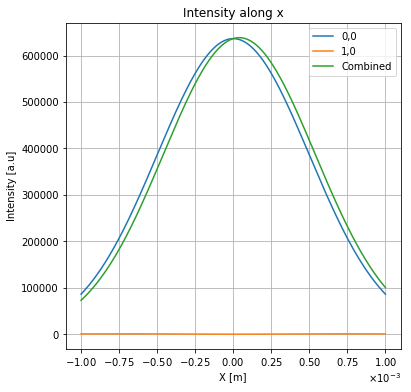

In [3]:
# spot centers for initial beam and translated beam
# Re[a10]/a00 = delta s/wo , w0 = 1e-3

a10 = .04
a00 = 1



m0 = pl.Modes((0,0,a00))
m1 = pl.Modes((1,0,a10))
m01 = pl.Modes((0,0,a00),(1,0,a10))

f0 =pl.Calculate2(a,b,m0,0)

f1 =pl.Calculate2(a,b,m1,0)
f01 = pl.Calculate2(a,b,m01,0)
f = pl.Calculate2(a,b,m01,0)


pl.IntensitySliceX2(0,f0,f1,f01,labels=['0,0','1,0','Combined'])

print ("predicted x shift: "+str(pl.np.real(a10)/1*a.w0) + " m")
print ("actual: " + str(pl.peakInt(f01).x[0]-pl.peakInt(f0).x[0]) + " m")

print ("% err: " + str(((pl.np.real(a10)/1*a.w0)-(pl.peakInt(f01).x[0]-pl.peakInt(f0).x[0]))*100/(pl.np.real(a10)/1*a.w0)))

print("Combined intensity 0,0 & 1,0 mode, x=y=z=0: " + str(abs(pl.Amplitude(a,0,0,0,m01))**2))
print("Predicted combined intensity, x=y=z=0: " + str(abs(np.sqrt(2/pl.pi)/a.w0)**2))